<a href="https://colab.research.google.com/github/adindasyv/2141720096-machinelearning-2023/blob/master/Week%2011/tugas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TUGAS 1 : Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

Import Library

In [20]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Unduh Dataset

In [21]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

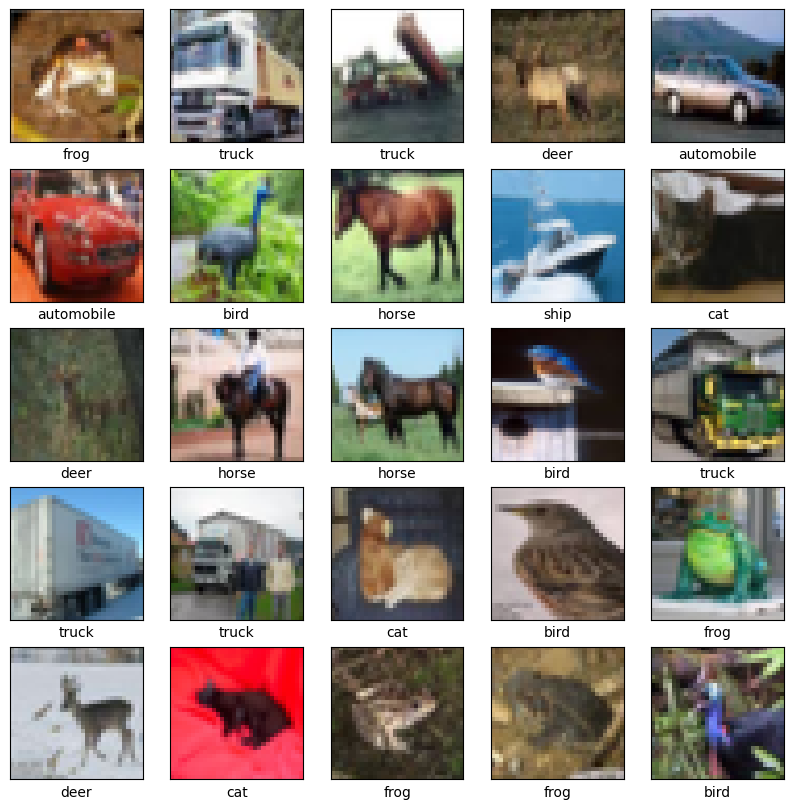

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
       'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [23]:
from tensorflow.keras import models, layers

model = models.Sequential()

# Layer Konvolusi Pertama
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Layer Konvolusi Kedua
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Layer Konvolusi Ketiga
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flattening
model.add(layers.Flatten())

# Layer Dense Pertama
model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Layer Output
model.add(layers.Dense(10))

In [24]:
# Compile Model dengan Learning Rate yang Lebih Rendah
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 16s 9ms/step - loss: 7.9062 - accuracy: 0.3260 - val_loss: 6.1139 - val_accuracy: 0.4570
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 5.3383 - accuracy: 0.4399 - val_loss: 4.3155 - val_accuracy: 0.4925
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 3.6945 - accuracy: 0.5002 - val_loss: 2.9901 - val_accuracy: 0.5598
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.6597 - accuracy: 0.5510 - val_loss: 2.3506 - val_accuracy: 0.5656
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.0186 - accuracy: 0.5922 - val_loss: 1.6870 - val_accuracy: 0.6468
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6324 - accuracy: 0.6260 - val_loss: 1.4184 - val_accuracy: 0.6709
Epoch 7/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.3870 - accuracy: 0.6534 - val_loss: 1.3019 - val_ac

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_4 (Bat  (None, 30, 30, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_5 (Bat  (None, 13, 13, 128)      

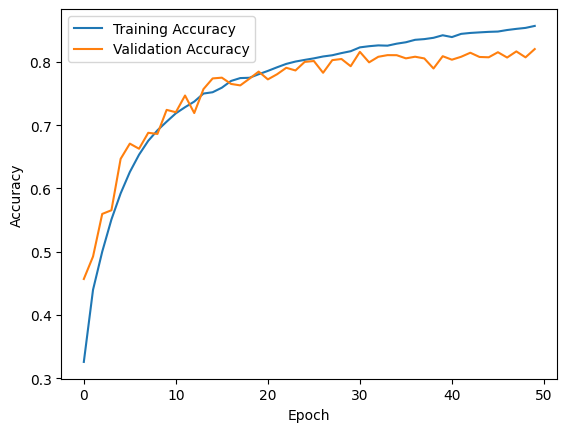

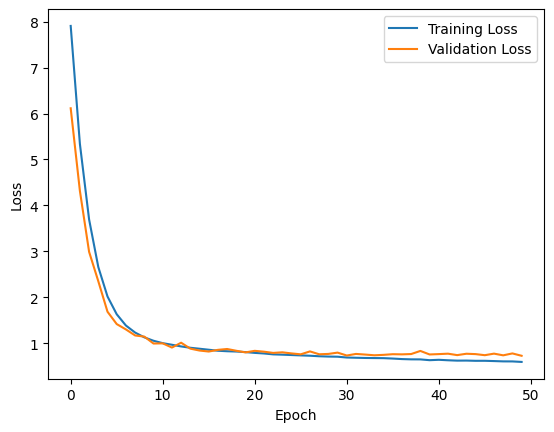

In [29]:
import matplotlib.pyplot as plt

# Membuat plot untuk akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Membuat plot untuk loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [30]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Cetak hasil akurasi
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')


313/313 - 1s - loss: 0.7286 - accuracy: 0.8203 - 920ms/epoch - 3ms/step
Test Accuracy: 0.8202999830245972
Test Loss: 0.7285782098770142


### Kesimpulan

Terdapat perbedaan hasil akurasi pada praktikum 2 dan tugas 1. Pada praktikum 2, didapatkan akurasi sebesar **70.64%**, sedangkan di tugas 1 mendapatkan akurasi sebesar **82.02%**. Hal ini bisa terjadi dikarenakan:
1. Terdapat perubahan arsitektur dimana pada tugas 1 mengadopsi arsitektur yang lebih kompleks dengan penggunaan **batch normalization, dropout, dan regularisasi L2**. Ini memberikan model lebih banyak kapasitas untuk menangkap fitur dengan mencegah overfitting. Lain halnya pada praktikum 1 hanya menggunakan arsitektur sederhana yaitu menggunakan **tiga layer konvolusi, dua layer max polling, dan dua layer dense**
2. Lalu pada tugas 1 juga dilatih sebanyak 50 epoch, berbeda dengan praktikum 2 hanya 10 epoch.

Bisa disimpulkan bahwa dari penambahan teknik seperti batch normalization dan dropout dengan penyesuaian arsitektur dengan penyesuaian arsitektur telah meningkatkan performa model pada data uji